In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


## Let's load the Boston House Pricing Dataset

In [2]:
df = pd.read_csv('./HousingData.csv')
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


CRIM - per capita crime rate by town

ZN - proportion of residential land zoned for lots over 25,000 sq.ft.

INDUS - proportion of non-retail business acres per town.

CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)

NOX - nitric oxides concentration (parts per 10 million)

RM - average number of rooms per dwelling

AGE - proportion of owner-occupied units built prior to 1940

DIS - weighted distances to five Boston employment centres

RAD - index of accessibility to radial highways

TAX - full-value property-tax rate per $10,000

PTRATIO - pupil-teacher ratio by town

B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town

LSTAT - % lower status of the population

MEDV - Median value of owner-occupied homes in $1000's

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [4]:
## Let's check the description of the dataset
df.describe()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,486.000000,486.000000,486.000000,486.000000,506.000000,506.000000,486.000000,506.000000,506.000000,506.000000,506.000000,506.000000,486.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.720192,23.388876,6.835896,0.255340,0.115878,0.702617,27.999513,2.105710,8.707259,168.537116,2.164946,91.294864,7.155871,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081900,0.000000,5.190000,0.000000,0.449000,5.885500,45.175000,2.100175,4.000000,279.000000,17.400000,375.377500,7.125000,17.025000
50%,0.253715,0.000000,9.690000,0.000000,0.538000,6.208500,76.800000,3.207450,5.000000,330.000000,19.050000,391.440000,11.430000,21.200000
75%,3.560263,12.500000,18.100000,0.000000,0.624000,6.623500,93.975000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [5]:
print(df.columns)

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')


In [6]:
df=df[["CRIM","ZN","INDUS","CHAS","NOX","RM","AGE","DIS","RAD","TAX","PTRATIO","B","LSTAT","MEDV"]]
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,NaN,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [7]:
df['MEDV']

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: MEDV, Length: 506, dtype: float64

## Preparing the Dataset

In [8]:
# Separate X (features) and y (target)
X = df.drop(columns='MEDV')  
y = df['MEDV']               

# Get feature names
feature_names = X.columns.tolist()


dataset = pd.DataFrame(X.values, columns=feature_names)

print(dataset.head())


      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  
0     15.3  396.90   4.98  
1     17.8  396.90   9.14  
2     17.8  392.83   4.03  
3     18.7  394.63   2.94  
4     18.7  396.90    NaN  


In [9]:
dataset['Price']=y.values
dataset.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,NaN,36.2


In [10]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  Price    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [11]:
## Summarizing the dataset
dataset.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
count,486.000000,486.000000,486.000000,486.000000,506.000000,506.000000,486.000000,506.000000,506.000000,506.000000,506.000000,506.000000,486.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.720192,23.388876,6.835896,0.255340,0.115878,0.702617,27.999513,2.105710,8.707259,168.537116,2.164946,91.294864,7.155871,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081900,0.000000,5.190000,0.000000,0.449000,5.885500,45.175000,2.100175,4.000000,279.000000,17.400000,375.377500,7.125000,17.025000
50%,0.253715,0.000000,9.690000,0.000000,0.538000,6.208500,76.800000,3.207450,5.000000,330.000000,19.050000,391.440000,11.430000,21.200000
75%,3.560263,12.500000,18.100000,0.000000,0.624000,6.623500,93.975000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [12]:
## Check the missing values
dataset.isnull().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
Price       0
dtype: int64

In [13]:
# Fill numerical columns with mean
for col in ['CRIM', 'ZN','INDUS', 'AGE', 'LSTAT']:
    dataset[col] = dataset[col].fillna(dataset[col].mean())

# Fill categorical column with mode
dataset['CHAS'] = dataset['CHAS'].fillna(dataset['CHAS'].mode()[0])

# Now check again:
print(dataset.isnull().sum())


CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
Price      0
dtype: int64


In [14]:
## Exploratory Data Analysis (EDA)
## Correlation
dataset.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
CRIM,1.000000,-0.182930,0.391161,-0.053710,0.410377,-0.215434,0.344934,-0.366523,0.608886,0.566528,0.273384,-0.370163,0.434044,-0.379695
ZN,-0.182930,1.000000,-0.513336,-0.034471,-0.502287,0.316550,-0.541274,0.638388,-0.306316,-0.308334,-0.403085,0.167431,-0.407549,0.365943
INDUS,0.391161,-0.513336,1.000000,0.054172,0.740965,-0.381457,0.614592,-0.699639,0.593176,0.716062,0.384806,-0.354597,0.567354,-0.478657
CHAS,-0.053710,-0.034471,0.054172,1.000000,0.070867,0.106797,0.073549,-0.092318,-0.003339,-0.035822,-0.109451,0.050608,-0.047808,0.183844
NOX,0.410377,-0.502287,0.740965,0.070867,1.000000,-0.302188,0.711461,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.572379,-0.427321
RM,-0.215434,0.316550,-0.381457,0.106797,-0.302188,1.000000,-0.241351,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.602962,0.695360
AGE,0.344934,-0.541274,0.614592,0.073549,0.711461,-0.241351,1.000000,-0.724353,0.449989,0.500589,0.262723,-0.265282,0.574893,-0.380223
DIS,-0.366523,0.638388,-0.699639,-0.092318,-0.769230,0.205246,-0.724353,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.483429,0.249929
RAD,0.608886,-0.306316,0.593176,-0.003339,0.611441,-0.209847,0.449989,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.468440,-0.381626
TAX,0.566528,-0.308334,0.716062,-0.035822,0.668023,-0.292048,0.500589,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.524545,-0.468536


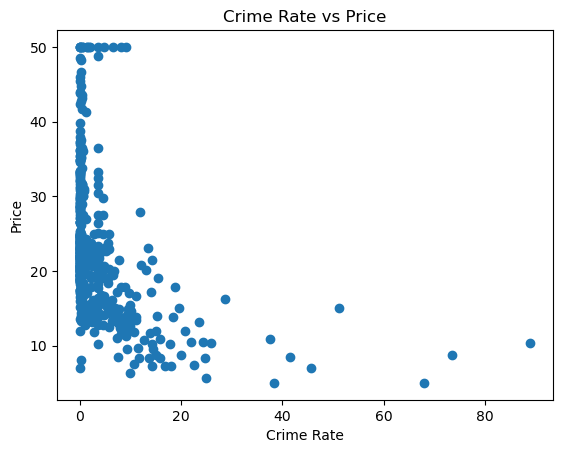

In [15]:
plt.scatter(dataset['CRIM'], dataset['Price'])
plt.xlabel('Crime Rate')
plt.ylabel('Price')
plt.title('Crime Rate vs Price')
plt.show()

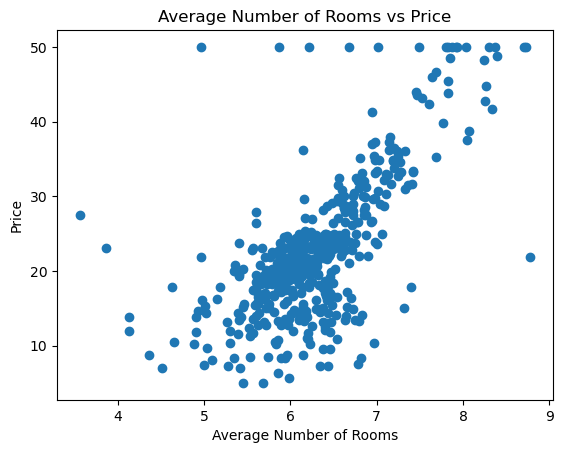

In [16]:
plt.scatter(dataset['RM'], dataset['Price'])
plt.xlabel('Average Number of Rooms')
plt.ylabel('Price') 
plt.title('Average Number of Rooms vs Price')
plt.show()

RuntimeError: `lowess=True` requires statsmodels, an optional dependency, to be installed.

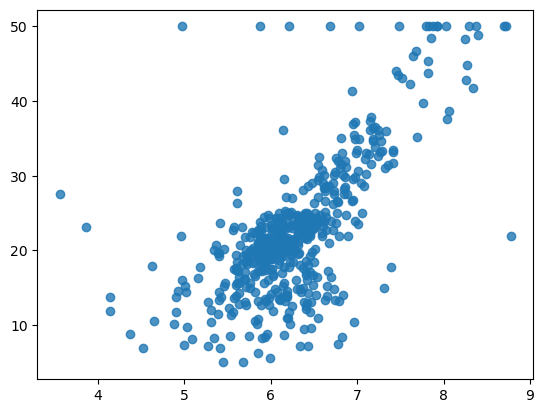

In [17]:
import seaborn as sns
sns.regplot(x='RM', y='Price', data=dataset, lowess=True, line_kws={'color': 'red', 'lw': 1})
# we can see that the average number of rooms has a positive correlation with the price of the house.
# The more rooms, the higher the price.
# The regression line is a good fit for the data points.
# The data points are not perfectly linear, but the trend is clear.

In [ ]:
sns.regplot(x='LSTAT', y='Price', data=dataset, lowess=True, line_kws={'color': 'red', 'lw': 1})

In [ ]:
sns.regplot(x="CHAS", y="Price", data=dataset, lowess=True, line_kws={'color': 'red', 'lw': 1})

In [ ]:
sns.regplot(x="PTRATIO", y="Price", data=dataset, lowess=True, line_kws={'color': 'red', 'lw': 1})

In [ ]:
## Independant and Dependent features

dataset
# price is the dependent feature and the rest are independent features.

In [ ]:
# We can also check the correlation between the features and the target variable (Price) using a heatmap.
# The heatmap will show the correlation between all the features and the target variable.

plt.figure(figsize=(12, 8))
sns.heatmap(dataset.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
X=dataset.iloc[:, :-1]
y=dataset.iloc[:, -1]
X.head()

In [ ]:
y

In [ ]:
## Train Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train

In [ ]:
X_test
# We're not going to use the test set for training
# We will use it to evaluate the model performance after training.
# We will use the training set to train the model and the test set to evaluate the model performance.

In [ ]:
print("Skewness: ", dataset.skew())
print("Kurtosis: ", dataset.kurtosis())



In [ ]:
for col in dataset.columns:
    if col != 'Price':  # don't plot target
        plt.figure(figsize=(8, 5))
        sns.histplot(dataset[col], kde=True, bins=30)
        plt.title(f"Distribution of {col}")
        plt.xlabel(col)
        plt.ylabel('Frequency')
        plt.show()


In [ ]:
## Standaridze the dataset
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
# in X_test_scaled we use transform instead of fit_transform because we don't want to fit the scaler again on the test set.
# This is done to avoid data leakage from the test set into the training set.

In [ ]:
X_train

In [ ]:
X_test

## Model Training

In [ ]:
from sklearn.linear_model import LinearRegression


In [ ]:
regression = LinearRegression()

In [ ]:
regression.fit(X_train_scaled, y_train)
# The model is trained now.
# We can check the coefficients of the model to see the importance of each feature.
print("Coefficients: ", regression.coef_)
# The coefficients represent the change in the target variable (Price) for a one unit change in the feature.
# A positive coefficient means that the feature has a positive impact on the target variable (Price).
# A negative coefficient means that the feature has a negative impact on the target variable (Price).
# The larger the absolute value of the coefficient, the more important the feature is in the model.

In [ ]:
print("Intercept: ", regression.intercept_)
# The intercept is the value of the target variable (Price) when all the features are 0.
# In this case, it doesn't have much meaning because the features are standardized.

In [ ]:
## on which parameter the model is trained on
print("Parameters: ", regression.get_params())

In [ ]:
## Prediction with Test Data
reg_pred=regression.predict(X_test_scaled)

In [ ]:
reg_pred

## Assumptions

In [ ]:
## plot a scatter plot of the predicted values vs the actual values
plt.scatter(y_test, reg_pred)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual Price vs Predicted Price')
plt.show()
# The plot is linear, which means that the model is a good fit for the data.
# The points are close to the line, which means that the model is a good fit for the data.

In [ ]:
## Residuals (Errors)
residuals = y_test - reg_pred
residuals

In [ ]:
## Plot the residuals
sns.displot(residuals, kde=True)
plt.title('Residuals Distribution')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()
# There are outliers in the residuals
# We stil have a normal distribution of the residuals.
# The residuals are normally distributed, which means that the model is a good fit for the data.

In [ ]:
## Scatter plot with respect to prediction and residuals
plt.scatter(reg_pred, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Price')
plt.ylabel('Residuals')
# They're scattered uniformly around 0, which means that the model is a good fit for the data.

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

print("Mean Absolute Error: ", mean_absolute_error(y_test, reg_pred))
print("Mean Squared Error: ", mean_squared_error(y_test, reg_pred))
print("Root Mean Squared Error: ", np.sqrt(mean_squared_error(y_test, reg_pred)))


In [ ]:
from sklearn.metrics import r2_score
print("R2 Score: ", r2_score(y_test, reg_pred))
# The R2 score is 0.65, which means that the model explains 65% of the variance in the target variable (Price).

## R square and adjusted R square

$$
R^2 = 1 - \frac{SSR}{SST}
$$

Where:
- \( R^2 \) = Coefficient of determination
- \( SSR \) = Sum of Squares of Residuals
- \( SST \) = Total Sum of Squares


In [ ]:
from sklearn.metrics import r2_score
score = r2_score(y_test, reg_pred)
print("R2 Score: ", score)
# The R2 score is 0.65, which means that the model explains 65% of the variance in the target variable (Price).

##### Adjusted R2 = 1 - [(1-R2)*(n-1)/(n-k-1)]
Where: 
- R2: The R2 of the model
- n: The number of observations
- k: The number of predictors

In [ ]:
#display Adjusted R-squared 
1- (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

In [ ]:
from sklearn.preprocessing import FunctionTransformer, StandardScaler, PolynomialFeatures
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor

# log-transform skewed features
skewed_feats = ['CRIM','ZN','CHAS','B']
log_tf = FunctionTransformer(np.log1p, validate=False)

# column transformer
preproc = ColumnTransformer([
    ('log',     log_tf,        skewed_feats),
    ('passthru','passthrough', [c for c in X_train.columns if c not in skewed_feats])
])

# full pipeline
from tempfile import mkdtemp
cachedir = mkdtemp()

pipeline = Pipeline([
    ('pre',  preproc),
    #('poly', PolynomialFeatures(degree=2, include_bias=False, interaction_only=False)),
    ('scale',StandardScaler()),
    ('reg',  RandomForestRegressor(
                  n_estimators=200,
                  max_depth=5,
                  min_samples_leaf=2,
                  max_features='sqrt',
                  random_state=0))
], memory=cachedir)


In [ ]:
pipeline.fit(X_train, y_train)

In [ ]:
from sklearn.model_selection import cross_val_score

# R² on test
y_pred = pipeline.predict(X_test)
print("Test  R²:", r2_score(y_test, y_pred))

# Cross-validated R² on train
cv_scores = cross_val_score(pipeline, X_train, y_train,
                            cv=5, scoring='r2')
print(f"CV R²: {cv_scores.mean():.3f} ± {cv_scores.std():.3f}")


# New Data Prediction

In [ ]:
new_data = X_test.iloc[[0]]  

# predict
prediction = pipeline.predict(new_data)

print(prediction)

## Pickling the Model file for Deployment

In [ ]:
import pickle

In [ ]:
# Save the entire pipeline, not just the regression model
with open('regmodel.pkl', 'wb') as file:
    pickle.dump(pipeline, file)

In [ ]:
pickled_model = pickle.load(open('regmodel.pkl', 'rb'))

In [ ]:
pickled_model.predict(new_data)